### TEAM ZM5

# EDSA MOVIE RECOMMENDATION CHALLENGE 

### Installing packages
Please download all relevant packages in. There is no terminal so you will need to pip install everything.

In [1]:
#!wget "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/27685/2229266/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1626119890&Signature=RvOBNnir2bFl4hFPSH%2BHXmXKo75wdgbykpMl2SAWO%2FvM3uvSpT60IxVyI5dFDpBzi%2FKs0ljnJ59nOlHwqMe6zrFEj%2F1v3rS0oZJAn5iJFnO9QnwFMnhpf9IQJFUFHitvZ%2F9VF8zD7vMnK1QioodteZUxYc458hfBSHtZaBXq9KaurVFJf8c21KMm%2FxKz9KOKyLKx8nTDogkIUdK%2FQ852tUQrUTaUxS376BENKmzBhtukOiizqESj3ihlJ%2BFNsMPWGetf0IFm0x8GTWO5lfH5mcOHKi43sirvrCe2tR1ANbgVh34uwo7N9B9jec%2FOa%2F8iAR%2F4IiDCzJsU3tv1ydBVJA%3D%3D&response-content-disposition=attachment%3B+filename%3Dedsa-movie-recommendation-challenge.zip"

In [2]:
#!unzip '/content/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1626119890&Signature=RvOBNnir2bFl4hFPSH+HXmXKo75wdgbykpMl2SAWO%2FvM3uvSpT60IxVyI5dFDpBzi%2FKs0ljnJ59nOlHwqMe6zrFEj%2F1v3rS0oZJAn5iJFnO9QnwFMnhpf9IQJFUFHit'

In [3]:
#!pip install LibRecommender
#!pip install surprise
#!pip install comet_ml

### Imports

In [5]:
import comet_ml

In [6]:
# First import comet_ml at the top of your file
from comet_ml import Experiment

In [7]:
# Create an experiment with your api key for version control
experiment = Experiment(
    api_key="amGQj1TC3Wyk9LYf7bD9xNV6G",
    project_name="movie-reccomender-edsa",
    workspace="daniel-bru",
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/daniel-bru/movie-reccomender-edsa/dd6f7bd11f7049869dc220aea3d1401c



In [9]:
# Install packages here
# Packages for data processing
import numpy as np
import pandas as pd
import datetime
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re
from scipy.sparse import csr_matrix
import scipy as sp

# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Packages for modeling
from surprise import Reader
from surprise import Dataset
from surprise import KNNWithMeans
from surprise import KNNBasic
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV
from surprise import SVD
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
import heapq
from libreco.algorithms import FM, WideDeep, DeepFM, AutoInt, DIN

from libreco.data import random_split, DatasetPure, DataInfo
from libreco.data import split_by_ratio_chrono, DatasetFeat
from libreco.algorithms import SVD as libSVD
from libreco.algorithms import SVDpp
from libreco.algorithms import FM, WideDeep, DeepFM, AutoInt, DIN
from libreco.evaluation import evaluate
import os
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ["KMP_WARNINGS"] = "FALSE"
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
def reset_state(name):
    tf.compat.v1.reset_default_graph()
    print("\n", "=" * 30, name, "=" * 30)

# Packages for model evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from time import time

# Package to suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Packages for saving models
import pickle

Instructions for updating:
non-resource variables are not supported in the long term


### Reading in data

In [10]:
root_path = '/content/'
df_sample_submission = pd.read_csv(root_path + 'sample_submission.csv')
df_movies = pd.read_csv(root_path + 'movies.csv')
df_imdb = pd.read_csv(root_path + 'imdb_data.csv')
df_genome_scores = pd.read_csv(root_path + 'genome_scores.csv')
df_genome_tags = pd.read_csv(root_path +'genome_tags.csv')
train = pd.read_csv(root_path + 'train.csv')
df_test = pd.read_csv(root_path + 'test.csv')
df_tags = pd.read_csv(root_path + 'tags.csv')
df_links = pd.read_csv(root_path + 'links.csv')

In [12]:
df_genres = pd.read_csv(root_path + 'genres.csv')

In [9]:
pd.set_option("display.max.column", None)
print(df_sample_submission.info())
df_sample_submission.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000019 entries, 0 to 5000018
Data columns (total 2 columns):
 #   Column  Dtype  
---  ------  -----  
 0   Id      object 
 1   rating  float64
dtypes: float64(1), object(1)
memory usage: 76.3+ MB
None


,Id,rating
0,1_2011,1.0
1,1_4144,1.0
2,1_5767,1.0
3,1_6711,1.0
4,1_7318,1.0


In [10]:
print(movies.info())
movies.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB
None


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [11]:
print(df_imdb.info())
df_imdb.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movieId        27278 non-null  int64  
 1   title_cast     17210 non-null  object 
 2   director       17404 non-null  object 
 3   runtime        15189 non-null  float64
 4   budget         7906 non-null   object 
 5   plot_keywords  16200 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB
None


,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


In [12]:
print(df_genome_scores.info())
df_genome_scores.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15584448 entries, 0 to 15584447
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movieId    int64  
 1   tagId      int64  
 2   relevance  float64
dtypes: float64(1), int64(2)
memory usage: 356.7 MB
None


,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


In [13]:
print(df_genome_tags.info())
df_genome_tags.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tagId   1128 non-null   int64 
 1   tag     1128 non-null   object
dtypes: int64(1), object(1)
memory usage: 17.8+ KB
None


,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [14]:
print(df_tags.info())
df_tags.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093360 entries, 0 to 1093359
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   userId     1093360 non-null  int64 
 1   movieId    1093360 non-null  int64 
 2   tag        1093344 non-null  object
 3   timestamp  1093360 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 33.4+ MB
None


,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [15]:
print(df_links.info())
df_links.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  62423 non-null  int64  
 1   imdbId   62423 non-null  int64  
 2   tmdbId   62316 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.4 MB
None


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [ ]:
print(train.info())
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 305.2 MB
None


,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [ ]:
print(df_test.info())
df_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000019 entries, 0 to 5000018
Data columns (total 2 columns):
 #   Column   Dtype
---  ------   -----
 0   userId   int64
 1   movieId  int64
dtypes: int64(2)
memory usage: 76.3 MB
None


,userId,movieId
0,1,2011
1,1,4144
2,1,5767
3,1,6711
4,1,7318


# Exploratory Data Analysis

**Most common Genres**

In [11]:
# Create dataframe containing only the movieId and genres
movies_genres = pd.DataFrame(movies[['movieId', 'genres']],
                             columns=['movieId', 'genres'])

# Split genres seperated by "|" and create a list containing the genres allocated to each movie
movies_genres.genres = movies_genres.genres.apply(lambda x: x.split('|'))

# Create expanded dataframe where each movie-genre combination is in a seperate row
movies_genres = pd.DataFrame([(tup.movieId, d) for tup in movies_genres.itertuples() for d in tup.genres],
                             columns=['movieId', 'genres'])

movies_genres.head()

,movieId,genres
0,1,Adventure
1,1,Animation
2,1,Children
3,1,Comedy
4,1,Fantasy


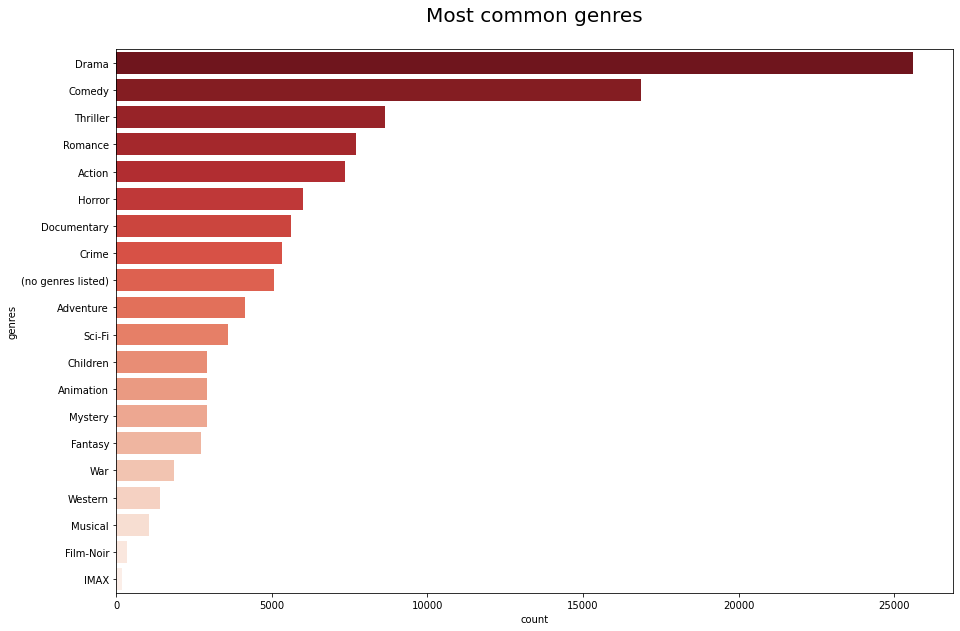

In [12]:
# Plot the genres from most common to least common
plot = plt.figure(figsize=(15, 10))
plt.title('Most common genres\n', fontsize=20)
sns.countplot(y="genres", data=movies_genres,
              order=movies_genres['genres'].value_counts(ascending=False).index,
              palette='Reds_r')
plt.show()

**Most common actors**

In [17]:
# Create dataframe containing only the movieId and cast members
cast = pd.DataFrame(df_imdb[['movieId', 'title_cast']],
                             columns=['movieId', 'title_cast'])

# Split title_cast seperated by "|" and create a list containing the cast members in each movie
cast.title_cast = cast.title_cast.astype(str).apply(lambda x: x.split('|'))

# Create expanded dataframe where each movie - cast member combination is in a seperate row
cast = pd.DataFrame([(tup.movieId, d) for tup in cast.itertuples() for d in tup.title_cast],
                             columns=['movieId', 'title_cast'])

mostc_cast = cast['title_cast'].value_counts(ascending=False).index.tolist()[:50]

print('Total Cast Members:', len(list(cast['title_cast'].unique())))
print('Most Common Cast Members:\n', mostc_cast)
display(cast.head())

Total Cast Members: 121036
Most Common Cast Members:
 ['nan', 'Samuel L. Jackson', 'Steve Buscemi', 'Keith David', 'Willem Dafoe', 'Robert De Niro', 'Brian Cox', 'Gérard Depardieu', 'Christopher Walken', 'Morgan Freeman', 'Bruce Willis', 'Danny Glover', 'Alec Baldwin', 'Peter Stormare', 'Nicolas Cage', 'Richard Jenkins', 'Stanley Tucci', 'Susan Sarandon', 'Julianne Moore', 'Stellan Skarsgård', 'Woody Harrelson', 'Tom Wilkinson', 'John Goodman', 'Antonio Banderas', 'Christopher McDonald', 'Val Kilmer', 'Jeff Bennett', 'Ed Harris', 'Johnny Depp', 'John Cusack', 'Forest Whitaker', 'Ray Liotta', 'John Leguizamo', 'Harvey Keitel', 'Donald Sutherland', 'Luis Guzmán', 'Stephen Tobolowsky', 'Paul Giamatti', 'George W. Bush', 'Danny Trejo', 'John Malkovich', 'Jim Broadbent', 'Richard Riehle', 'David Strathairn', 'Ewan McGregor', 'William H. Macy', 'Jim Cummings', 'Ving Rhames', 'Robert Downey Jr.', 'Kathy Bates']


,movieId,title_cast
0,1,Tom Hanks
1,1,Tim Allen
2,1,Don Rickles
3,1,Jim Varney
4,1,Wallace Shawn


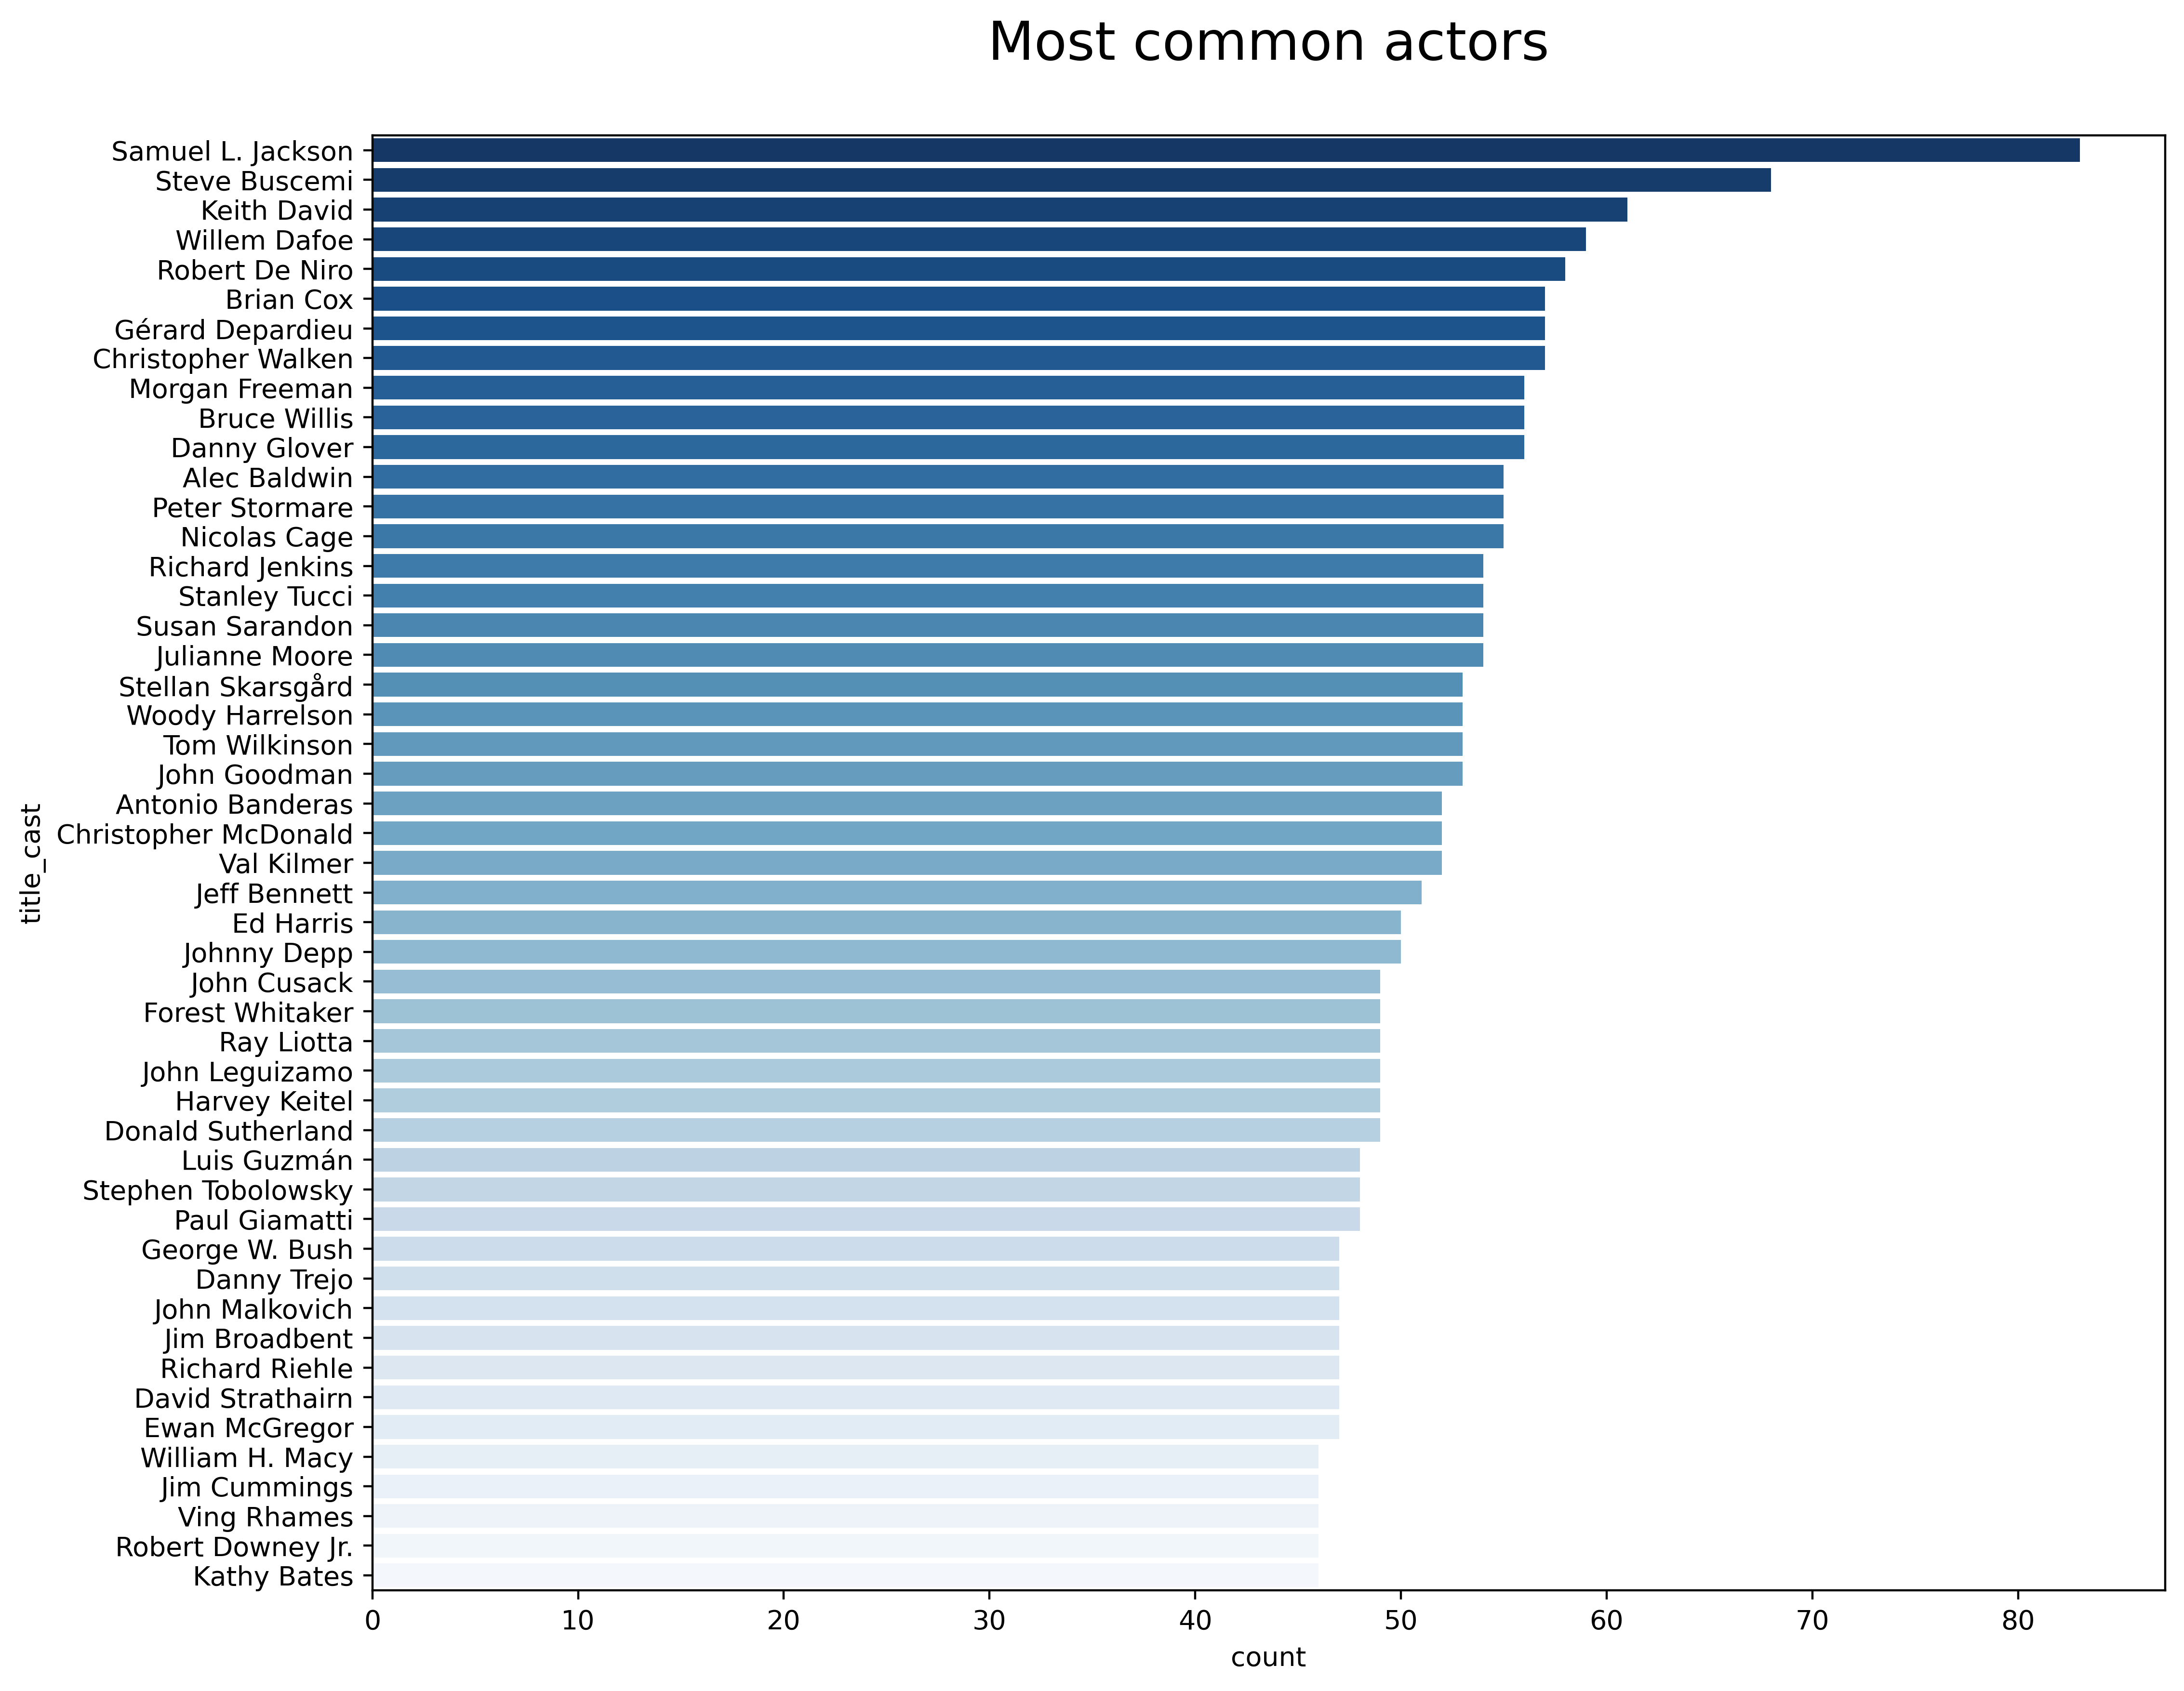

In [18]:
# Plot the genres from most common to least common
plot = plt.figure(figsize=(12, 10), dpi=400)
plt.title('Most common actors\n', fontsize=20)
sns.countplot(y="title_cast", data=cast,
              order=mostc_cast[1:50],
              palette='Blues_r')
plt.show()

## Data Prepartion

## Modelling 



### Collaborative Filtering 

In [ ]:
ratings = train.copy()
ratings_dict = {'itemID': list(ratings.movieId),
                'userID': list(ratings.userId),
                'rating': list(ratings.rating)}
df = pd.DataFrame(ratings_dict)

# A reader is still needed but only the rating_scale param is requiered.
reader = Reader(rating_scale=(0.5, 5.0))
# The columns must correspond to user id, item id and ratings (in that order).
data = Dataset.load_from_df(df[['userID', 'itemID', 'rating']], reader)

In [ ]:
%%time
trainset, testset = train_test_split(data, test_size=.01, random_state = 1)

#### SVD      (surprise Package)

In [ ]:
%%time
algo = SVD()
# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)

# Compute RMSE
accuracy.rmse(predictions)

RMSE: 0.8164
Wall time: 6min 59s


0.8164059812554958

In [ ]:
%%time
algo = SVD(random_state = 1, n_epochs= 17, verbose=True, n_factors =220, lr_all = 0.016, reg_all =0.02, init_std_dev = 0.005, init_mean = -0.037)
# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)

# Compute RMSE
accuracy.rmse(predictions) # rmse: 0.8101      5min 29s

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
RMSE: 0.8045
Wall time: 11min 5s


0.804545620921777

In [ ]:
trainset = data.build_full_trainset()
algo = SVD(random_state = 1, n_epochs= 16, verbose=True, n_factors =220, lr_all = 0.016, reg_all =0.02, init_std_dev = 0.005, init_mean = -0.037)
algo.fit(trainset)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15


#### SVD (LibRecommender package)

In [ ]:
data = df_train.copy()
data.rename(columns={'userId':'user'},inplace=True)
data.rename(columns={'movieId':'item'},inplace=True)
data.rename(columns={'rating':'label'},inplace=True)
data.rename(columns={'timestamp':'time'},inplace=True)

# split whole data into three folds for training, evaluating and testing
train_data, eval_data, test_data = random_split(data, multi_ratios=[0.99, 0.005, 0.005])

train_data, data_info = DatasetPure.build_trainset(train_data)
eval_data = DatasetPure.build_evalset(eval_data)
test_data = DatasetPure.build_testset(test_data)
print(data_info)

n_users: 160834, n_items: 13036, data sparsity: 0.4650 %


In [ ]:
def reset_state(name):
    tf.compat.v1.reset_default_graph()
    print("\n", "=" * 30, name, "=" * 30)

In [ ]:
%%time
reset_state('libSVD')
svd_lib = libSVD(task="rating", data_info=data_info, embed_size=16, n_epochs=3, lr=0.005,batch_size=10000, batch_sampling=True)  # embed_size=8, n_epochs=3, lr=0.005,batch_size=10000
# monitor metrics on eval_data during training
svd_lib.fit(train_data, verbose=2, eval_data=eval_data, metrics=["rmse", "mae", "r2"])

# do final evaluation on test data
print("evaluate_result: ", evaluate(model=svd_lib, data=test_data,
                                    metrics=["rmse", "mae"]))


 ============================== libSVD ==============================
Training start time: 2021-07-11 16:06:59


eval_pred: 100%|██████████| 7/7 [00:00<00:00, 539.91it/s]


Epoch 1 elapsed: 8.916s
	 train_loss: 0.7848
	 eval rmse: 0.8230
	 eval mae: 0.6243
	 eval r2: 0.3935


eval_pred: 100%|██████████| 7/7 [00:00<00:00, 501.34it/s]


Epoch 2 elapsed: 7.852s
	 train_loss: 0.6146
	 eval rmse: 0.8121
	 eval mae: 0.6152
	 eval r2: 0.4095


eval_pred: 100%|██████████| 7/7 [00:00<00:00, 638.06it/s]

Epoch 3 elapsed: 7.446s
	 train_loss: 0.547
	 eval rmse: 0.8186
	 eval mae: 0.6186
	 eval r2: 0.4000
evaluate_result:  {'rmse': 0.8158993788755492, 'mae': 0.6174194603255447}
Wall time: 24.9 s


#### SVDpp (LibRecommender package)

In [ ]:
%%time
reset_state('SVDpp')
svdpp = SVDpp(task="rating", data_info=data_info, embed_size=16, n_epochs=2, lr=0.005,batch_size=10000, batch_sampling=True)  # embed_size=16, n_epochs=2, lr=0.005,batch_size=10000
# monitor metrics on eval_data during training
svdpp.fit(train_data, verbose=2, eval_data=eval_data, metrics=["rmse", "mae", "r2"])

# do final evaluation on test data
print("evaluate_result: ", evaluate(model=svdpp, data=test_data,
                                    metrics=["rmse", "mae"]))


 ============================== SVDpp ==============================
Training start time: 2021-07-11 14:28:48


train: 100%|██████████| 976/976 [08:48<00:00,  1.85it/s]


Epoch 1 elapsed: 531.049s
	 train_loss: 0.7346


eval_pred: 100%|██████████| 7/7 [00:00<00:00, 438.68it/s]


	 eval rmse: 0.8112
	 eval mae: 0.6171
	 eval r2: 0.4141


train: 100%|██████████| 976/976 [08:46<00:00,  1.85it/s]


Epoch 2 elapsed: 529.057s
	 train_loss: 0.5981


eval_pred: 100%|██████████| 7/7 [00:00<00:00, 779.86it/s]


	 eval rmse: 0.8007
	 eval mae: 0.6088
	 eval r2: 0.4292


eval_pred: 100%|██████████| 7/7 [00:00<00:00, 701.89it/s]

evaluate_result:  {'rmse': 0.7970316494608983, 'mae': 0.604411352354703}
Wall time: 17min 48s


Train SVDpp on full dataset

In [ ]:
# data = pd.read_csv(root_path + 'train.csv', header=0, names = ["user", "item", "label", "time"])
# train_data, data_info = DatasetPure.build_trainset(data)

# reset_state('SVDpp')
# svdpp = SVDpp(task="rating", data_info=data_info, embed_size=16, n_epochs=2, lr=0.005,batch_size=10000, batch_sampling=True)
# svdpp.fit(train_data, verbose=2)

In [ ]:
print("prediction: ", svdpp.predict(user=5163, item=57669))
print("recommendation: ", svdpp.recommend_user(user=5163, n_rec=5))

prediction:  [4.2383614]
recommendation:  [(120478, 5.039912), (134252, 4.947643), (296, 4.922036), (1261, 4.9119997), (86377, 4.8843603)]


In [ ]:
svdpp.predict(df_train['userId'][:10], df_train['movieId'][:10])

array([4.4354897, 3.7348151, 4.1863747, 2.354507 , 3.3813767, 3.2520676,
       3.708427 , 1.837827 , 3.9626102, 3.4779892], dtype=float32)

In [ ]:
#### SVD (LibRecommender package)

In [ ]:
save_name = 'SVDpp_librecA'
df_pred =df_test.copy()
df_pred['rating'] = svdpp_pred
df_pred['Id'] = df_pred.apply(lambda x:'%s_%s' % (x['userId'],x['movieId']),axis=1)
df_pred['Id'] = df_pred.apply(lambda x:'%s_%s' % (x['userId'],x['movieId']),axis=1)
df_pred = df_pred[['Id', 'rating']]
df_pred.to_csv(save_name + '.csv', index=False)

Save SVDpp model

In [ ]:
"""
data_info.save(path="SVDpp_model_path")
svdpp.save(path="SVDpp_model_path", model_name="svdpp_model", manual=True,
                inference_only=False)
"""

In [ ]:
"""
tf.compat.v1.reset_default_graph()
data_info = DataInfo.load("SVDpp_model_path")

svdpp_loaded = SVDpp(task="rating", data_info=data_info, embed_size=16, n_epochs=2, lr=0.005,batch_size=10000, batch_sampling=True)

data = pd.read_csv(root_path + 'train.csv', header=0, names = ["user", "item", "label", "time"])
train_data, eval_data, test_data = random_split(data, multi_ratios=[0.99, 0.005, 0.005])
train_data, data_info = DatasetPure.build_trainset(train_data)
svdpp_loaded.rebuild_graph(path="SVDpp_model_path", model_name="svdpp_model",
                        full_assign=True, train_data=train_data)
"""

In [ ]:
#svdpp_loaded.predict(df_train['userId'][:10], df_train['movieId'][:10])

### Hybrid Models


In [19]:
def create_features(df, column, features):
    """Creates features from a column of lists where the list items will be the features."""
    
    features_df = pd.DataFrame(columns = features)
    all_features = pd.concat([df, features_df], axis=1)

    for i,row in all_features.iterrows():
        for feature in features:
            if feature in row.column:
                all_features[feature].iloc[i]= 1
    all_features = all_features.drop(column, axis=1)
    
    return all_features

In [ ]:
movies_genres = pd.DataFrame(df_movies[['movieId', 'genres']],
                             columns=['movieId', 'genres'])

# Split genres seperated by "|" and create a list containing the genres allocated to each movie
movies_genres.genres = movies_genres.genres.apply(lambda x: x.split('|'))
genres = ['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Mystery', 'Sci-Fi', 'IMAX', 'Documentary', 'War', 'Musical',
       'Western', 'Film-Noir', '(no genres listed)']
genre_encode = create_features(movies_genres[:5], 'genres', genres)
genre_encode.head()

In [ ]:
cast = pd.DataFrame(df_imdb[['movieId', 'title_cast']],
                             columns=['movieId', 'title_cast'])

# Split title_cast seperated by "|" and create a list containing the cast members in each movie
cast.title_cast = cast.title_cast.astype(str).apply(lambda x: x.split('|'))
cast_movie = pd.DataFrame([(tup.movieId, d) for tup in cast.itertuples() for d in tup.title_cast],
                             columns=['movieId', 'title_cast'])
mostc_cast = cast_movie['title_cast'].value_counts(ascending=False).index.tolist()[:50]

cast_encode = create_features(cast[:5], 'title_cast', mostc_cast[1:])
cast_encode.head()

In [ ]:
df_imdb.fillna(0, inplace=True)
df_imdb.budget = df_imdb.budget.astype(str).apply(lambda x: int(re.sub("[^0-9]", "", x)))

In [ ]:
# joining
df_train = train.copy()

rating_count = df_train.groupby('movieId')['rating'].count().reset_index()
rating_count.rename(columns = {'rating': 'movie_rating_count'}, inplace=True)
df_train = df_train.merge(rating_count, on='movieId')

user_count = df_train.groupby('userId')['rating'].count().reset_index()
user_count.rename(columns={'rating': 'user_rating_count'}, inplace=True)
df_train=df_train.merge(user_count, on='userId')

df_train = df_train[df_train['movie_rating_count'] > 20]
df_train = df_train[df_train['user_rating_count'] > 5]
df_train.head(3)

,userId,movieId,rating,timestamp,movie_rating_count,user_rating_count
0,5163,57669,4.0,1518349992,4253,22
1,5163,2671,1.0,1545511636,5698,22
2,5163,1247,4.5,1434310106,7569,22


In [ ]:
df_train.drop(['movie_rating_count','user_rating_count'], 1, inplace=True)
df_train.shape

(9848791, 4)

In [ ]:
df_train = pd.merge(df_train, genre_encode,on= 'movieId')
df_train = df_train.merge(cast_encode, on= 'movieId')
print(df_train.shape)

(9848791, 25)


In [ ]:
df_train = df_train.merge(df_imdb[['director', 'runtime', 'budget']], on= 'movieId').fillna(0)
df_train.head()

,userId,movieId,rating,timestamp,action,adventure,animation,children,comedy,crime,documentary,drama,fantasy,film,horror,imax,musical,mystery,no genres listed,noir,romance,sci-fi,thriller,war,western,title_cast,director,runtime,budget,plot_keywords
0,5163,57669,4.0,1518349992,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
1,87388,57669,3.5,1237455297,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
2,137050,57669,4.0,1425631854,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman


In [ ]:
print(df_train.columns)

Index(['userId', 'movieId', 'rating', 'timestamp', 'action', 'adventure',
       'animation', 'children', 'comedy', 'crime', 'documentary', 'drama',
       'fantasy', 'film', 'horror', 'imax', 'musical', 'mystery',
       'no genres listed', 'noir', 'romance', 'sci-fi', 'thriller', 'war',
       'western', 'title_cast', 'director', 'runtime', 'budget',
       'plot_keywords'],
      dtype='object')

In [ ]:
df_train.to_csv('train_feat.csv', index=False)

In [19]:
df_train = pd.read_csv('/content/train_feat.csv')
df_train.rename(columns={'userId':'user'},inplace=True)
df_train.rename(columns={'movieId':'item'},inplace=True)
df_train.rename(columns={'rating':'label'},inplace=True)
df_train.rename(columns={'timestamp':'time'},inplace=True)

data = df_train.copy()

sparse_col = [
    'title', 'genres', 'action', 'adventure', 'animation', 'children',
    'comedy', 'crime', 'documentary', 'drama', 'fantasy', 'film', 'horror',
    'imax', 'musical', 'mystery', 'no genres listed', 'noir', 'romance',
    'sci-fi', 'thriller', 'war', 'western', 'title_cast', 'director',
    'runtime', 'budget', 'plot_keywords'
]
item_col = [
    'title', 'genres', 'action', 'adventure', 'animation', 'children',
    'comedy', 'crime', 'documentary', 'drama', 'fantasy', 'film', 'horror',
    'imax', 'musical', 'mystery', 'no genres listed', 'noir', 'romance',
    'sci-fi', 'thriller', 'war', 'western', 'title_cast', 'director',
    'runtime', 'budget', 'plot_keywords'
]

# split whole data into three folds for training, evaluating and testing
train_data, eval_data, test_data = random_split(
    data, multi_ratios=[0.99, 0.005, 0.005])

train_data, data_info = DatasetFeat.build_trainset(train_data, item_col,
                                                   sparse_col)

eval_data = DatasetFeat.build_evalset(eval_data)
test_data = DatasetFeat.build_testset(test_data)
print(data_info)

n_users: 160834, n_items: 13036, data sparsity: 0.4650 %


In [21]:
reset_state("FM")
fm = FM("rating", data_info, embed_size=16, n_epochs=5,
            lr=0.005, lr_decay=True, reg=None, batch_size=10000,
            num_neg=1, use_bn=True, dropout_rate=None, tf_sess_config=None)
fm.fit(train_data, verbose=2, shuffle=True, eval_data=eval_data,
           metrics=["rmse", "mae", "r2"])

# do final evaluation on test data
print("evaluate_result: ", evaluate(model=fm, data=test_data,
                                    metrics=["rmse", "mae"]))


 ============================== FM ==============================
Training start time: 2021-07-11 18:10:30
total params: 2,955,876 | embedding params: 2,955,826 | network params: 50
With lr_decay, epoch 1 learning rate: 0.004999999888241291


train: 100%|██████████| 976/976 [00:34<00:00, 28.10it/s]


Epoch 1 elapsed: 39.675s
	 train_loss: 1.0731


eval_pred: 100%|██████████| 7/7 [00:00<00:00, 109.00it/s]


	 eval rmse: 0.8312
	 eval mae: 0.6320
	 eval r2: 0.3813
With lr_decay, epoch 2 learning rate: 0.004799999762326479


train: 100%|██████████| 976/976 [00:34<00:00, 28.60it/s]


Epoch 2 elapsed: 39.309s
	 train_loss: 0.627


eval_pred: 100%|██████████| 7/7 [00:00<00:00, 172.71it/s]


	 eval rmse: 0.8122
	 eval mae: 0.6163
	 eval r2: 0.4093
With lr_decay, epoch 3 learning rate: 0.004607999697327614


train: 100%|██████████| 976/976 [00:34<00:00, 28.25it/s]


Epoch 3 elapsed: 39.568s
	 train_loss: 0.553


eval_pred: 100%|██████████| 7/7 [00:00<00:00, 174.86it/s]


	 eval rmse: 0.8136
	 eval mae: 0.6163
	 eval r2: 0.4073
With lr_decay, epoch 4 learning rate: 0.004423679783940315


train: 100%|██████████| 976/976 [00:34<00:00, 28.13it/s]


Epoch 4 elapsed: 39.535s
	 train_loss: 0.5156


eval_pred: 100%|██████████| 7/7 [00:00<00:00, 176.54it/s]


	 eval rmse: 0.8196
	 eval mae: 0.6202
	 eval r2: 0.3984
With lr_decay, epoch 5 learning rate: 0.004246732220053673


train: 100%|██████████| 976/976 [00:34<00:00, 28.07it/s]


Epoch 5 elapsed: 39.698s
	 train_loss: 0.4938


eval_pred: 100%|██████████| 7/7 [00:00<00:00, 179.37it/s]


	 eval rmse: 0.8236
	 eval mae: 0.6199
	 eval r2: 0.3926


eval_pred: 100%|██████████| 7/7 [00:00<00:00, 180.30it/s]

evaluate_result:  {'rmse': 0.8233143010382663, 'mae': 0.6193446419457109}


In [ ]:
reset_state("Wide_Deep")

wd = WideDeep("rating", data_info, embed_size=16, n_epochs=2,
              lr={"wide": 0.01, "deep": 1e-4}, lr_decay=False, reg=None,
              batch_size=256, num_neg=1, use_bn=False, dropout_rate=None,
              hidden_units="128,64,32", tf_sess_config=None)
wd.fit(train_data, verbose=2, shuffle=True, eval_data=eval_data,
       metrics=["rmse", "mae", "r2"])
# do final evaluation on test data
print("evaluate_result: ", evaluate(model=wd, data=test_data,
                                    metrics=["rmse", "mae"]))

In [ ]:
reset_state("DeepFM")

deepfm = DeepFM("rating", data_info, embed_size=16, n_epochs=5,
                lr=1e-4, lr_decay=False, reg=None, batch_size=2048,
                num_neg=1, use_bn=False, dropout_rate=None,
                hidden_units="128,64,32", tf_sess_config=None)
deepfm.fit(train_data, verbose=2, shuffle=True, eval_data=eval_data,
           metrics=["rmse", "mae", "r2"])

print("evaluate_result: ", evaluate(model=deepfm, data=test_data,
                                    metrics=["rmse", "mae"]))

In [ ]:
reset_state("AutoInt")
autoint = AutoInt("rating", data_info, embed_size=16, n_epochs=10,
                  att_embed_size=(8, 8, 8), num_heads=4, use_residual=False,
                  lr=1e-3, lr_decay=False, reg=None, batch_size=2048,
                  num_neg=1, use_bn=False, dropout_rate=None,
                  hidden_units="128,64,32", tf_sess_config=None)
autoint.fit(train_data, verbose=2, shuffle=True, eval_data=eval_data,
            metrics=["rmse", "mae", "r2"])

In [ ]:
reset_state("DIN")
din = DIN("rating", data_info, embed_size=16, n_epochs=2,
              recent_num=10, lr=1e-4, lr_decay=False, reg=None,
              batch_size=2048, num_neg=1, use_bn=False, dropout_rate=None,
              hidden_units="128,64,32", tf_sess_config=None, use_tf_attention=True)
din.fit(train_data, verbose=2, shuffle=True, eval_data=eval_data,
            metrics=["rmse", "mae", "r2"])


### Create Submission
Hit the blue Publish button at the top of your notebook screen. It will take some time for your kernel to run. When it has finished your navigation bar at the top of the screen will have a tab for Output. This only shows up if you have written an output file (like we did in the Prepare Submission File step).

In [ ]:
# Pickle The Model
model_save_path = "SVD_tunedA1.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(algo,file)

In [ ]:
model_load_path = "/content/drive/MyDrive/Unsupervised Models/SVD_tunedA1.pkl"
with open(model_load_path,'rb') as file:
    algo = pickle.load(file)

In [ ]:
def create_submission(algo, save_name):
    
    ratings_predictions = [algo.predict(row.userId, row.movieId) for _,row in df_test.iterrows()]
    df_pred = pd.DataFrame(ratings_predictions)
    df_pred = df_pred.rename(columns={'uid':'userId', 'iid':'movieId','est':'rating'})
    df_pred.drop(['r_ui','details'],axis=1,inplace=True)
    # Create ID column
    df_pred['Id'] = df_pred.apply(lambda x:'%s_%s' % (x['userId'],x['movieId']),axis=1)
    df_pred['Id'] = df_pred.apply(lambda x:'%s_%s' % (x['userId'],x['movieId']),axis=1)
    df_pred = df_pred[['Id', 'rating']]
    df_pred.to_csv(save_name + '.csv', index=False)
    
    return pd.read_csv('./' + save_name + '.csv')

In [ ]:
submission = create_submission(algo, 'SVD_tunedA1')
submission.head(10)

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!wget 'https://kkb-production.jupyter-proxy.kaggle.net/k/67906852/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2IiwidHlwIjoiSldUIn0..EI35xsr87c7w1V2yD7-SDw.P1LKQiV4llJtRBVTZ6C8ZG7XZCLEuuotv8ZnngWLZaGkJnXeVRlmGzXehfIO1m9kRZVWT6Y0MlTOCLpuA9rwmXiuAqWSovowtSG2SlGQSutixactHV24vmnxUhSsda76o7PV8Si1ywiM_bH1MmAH5Yoi6X4ATCjeO2znT6Yr81sOgU3tGnpD4k_gpXuBSomIJW6M4VdWBLm1jbubY_Jx9g.8tA-L0aQQH60sptLCTJQIA/proxy/files/SVD_tunedA1.pkl'

--2021-07-10 23:42:23--  https://kkb-production.jupyter-proxy.kaggle.net/k/67906852/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2IiwidHlwIjoiSldUIn0..EI35xsr87c7w1V2yD7-SDw.P1LKQiV4llJtRBVTZ6C8ZG7XZCLEuuotv8ZnngWLZaGkJnXeVRlmGzXehfIO1m9kRZVWT6Y0MlTOCLpuA9rwmXiuAqWSovowtSG2SlGQSutixactHV24vmnxUhSsda76o7PV8Si1ywiM_bH1MmAH5Yoi6X4ATCjeO2znT6Yr81sOgU3tGnpD4k_gpXuBSomIJW6M4VdWBLm1jbubY_Jx9g.8tA-L0aQQH60sptLCTJQIA/proxy/files/SVD_tunedA1.pkl
Resolving kkb-production.jupyter-proxy.kaggle.net (kkb-production.jupyter-proxy.kaggle.net)... 35.244.180.134
Connecting to kkb-production.jupyter-proxy.kaggle.net (kkb-production.jupyter-proxy.kaggle.net)|35.244.180.134|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 740691882 (706M) [application/octet-stream]
Saving to: ‘SVD_tunedA1.pkl’

SVD_tunedA1.pkl     100%[===================>] 706.38M  24.5MB/s    in 31s     

2021-07-10 23:42:54 (22.7 MB/s) - ‘SVD_tunedA1.pkl’ saved [740691882/740691882]



In [14]:
cp "/content/train_feat.csv" "/content/drive/MyDrive/Unsupervised Models"

In [ ]:
from IPython.display import FileLink
FileLink('./train_feat.csv')